### Import

In [85]:
import frgtools.misc as frgm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)
import pandas as pd
import os
import plotly.graph_objects as go
from PIL import Image

fids = []
for f in frgm.listdir('/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/iPhone_pics/20201120/Stock_mix', display = False):
    if '.txt' in f and '.tif' not in f:
        continue
    fids.append(f)

### Selecting and Extracting Data

In [86]:
print(str(len(fids)))
fids

4


['/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/iPhone_pics/20201120/Stock_mix/A.png',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/iPhone_pics/20201120/Stock_mix/B.png',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/iPhone_pics/20201120/Stock_mix/C.png',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/iPhone_pics/20201120/Stock_mix/D.png']

In [105]:
data = {
    'name': [],
    'VIS': [],
}

red = 0
green = 1
blue = 2

for f in fids:
    data['name'].append(os.path.basename(f)[:-4])
    temp_image = Image.open(f)
    temp_image_asarray = np.array(temp_image)
    VIS = temp_image_asarray[:,:,blue] # 0=red , 1=green, 2=blue
    data['VIS'].append(VIS)

df = pd.DataFrame(data)
df = df.sort_values('name')

In [106]:
Filter_1 = ''
Filter_2 = ''
Filter_3 = ''

df_filter1 = df[df.name.str.contains(Filter_1)]
df_filter2 = df_filter1[df_filter1.name.str.contains(Filter_2)]

# df_filter2 = df_filter1[df_filter1.name.str.contains(Filter_2)]
df_filter3 = df_filter2[df_filter2.name.str.contains(Filter_3)]
df_filter3.reset_index(drop=True, inplace=True)

# list scans in your filtered dataset before plotting
for n in df_filter3['name'].unique(): print(n)

df_filtered = df_filter3
print(str(len(df_filtered)))

A
B
C
D
4


In [107]:
df_filtered['Mean_PL'] = np.array
for n in range(0, len(df_filtered)):
    df_filtered['Mean_PL'][n] = np.mean(df_filtered['VIS'][n]) 
    
df_filtered['Max_PL'] = np.array
for n in range(0, len(df_filtered)):
    df_filtered['Max_PL'][n] = np.max(df_filtered['VIS'][n]) 

### Plotting Average Counts

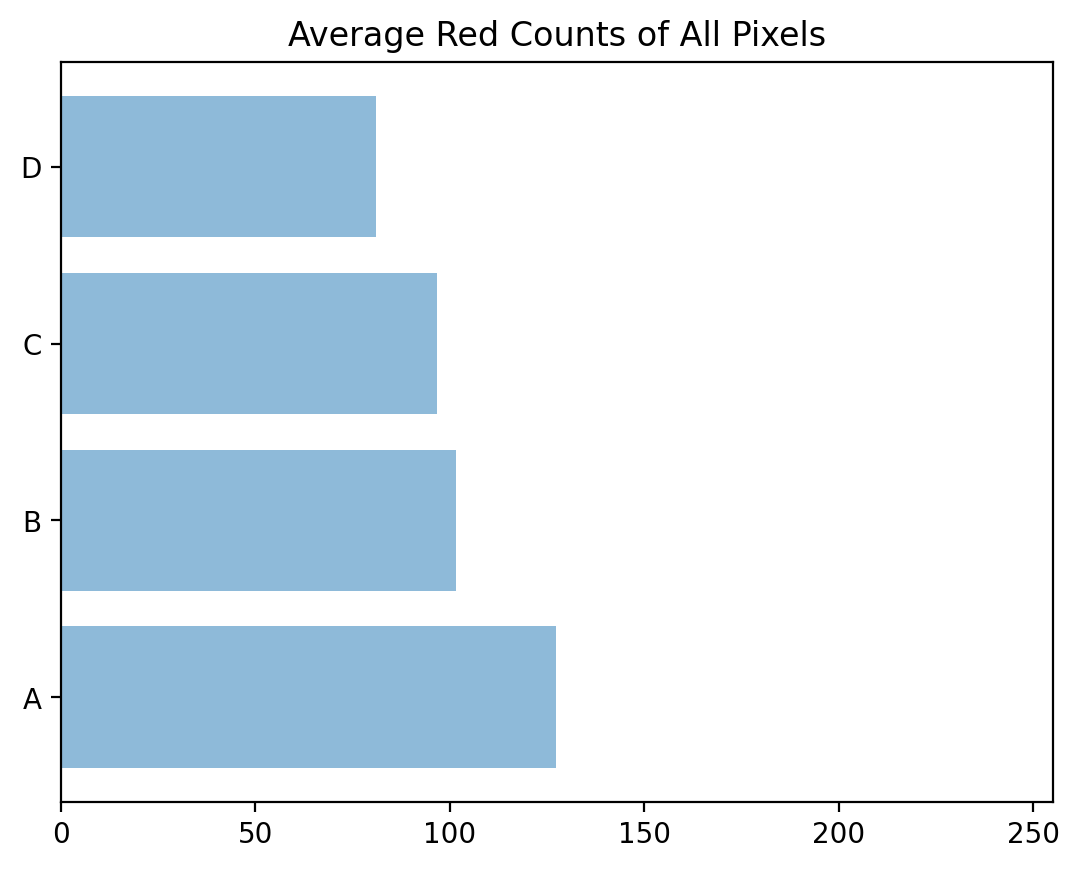

In [108]:
objects = sorted(df_filtered['name'])
y_pos = np.arange(len(objects))
performance = df_filtered['Mean_PL']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlim(0,255)


plt.title('Average Red Counts of All Pixels')

plt.show()

### Plotting Max Counts

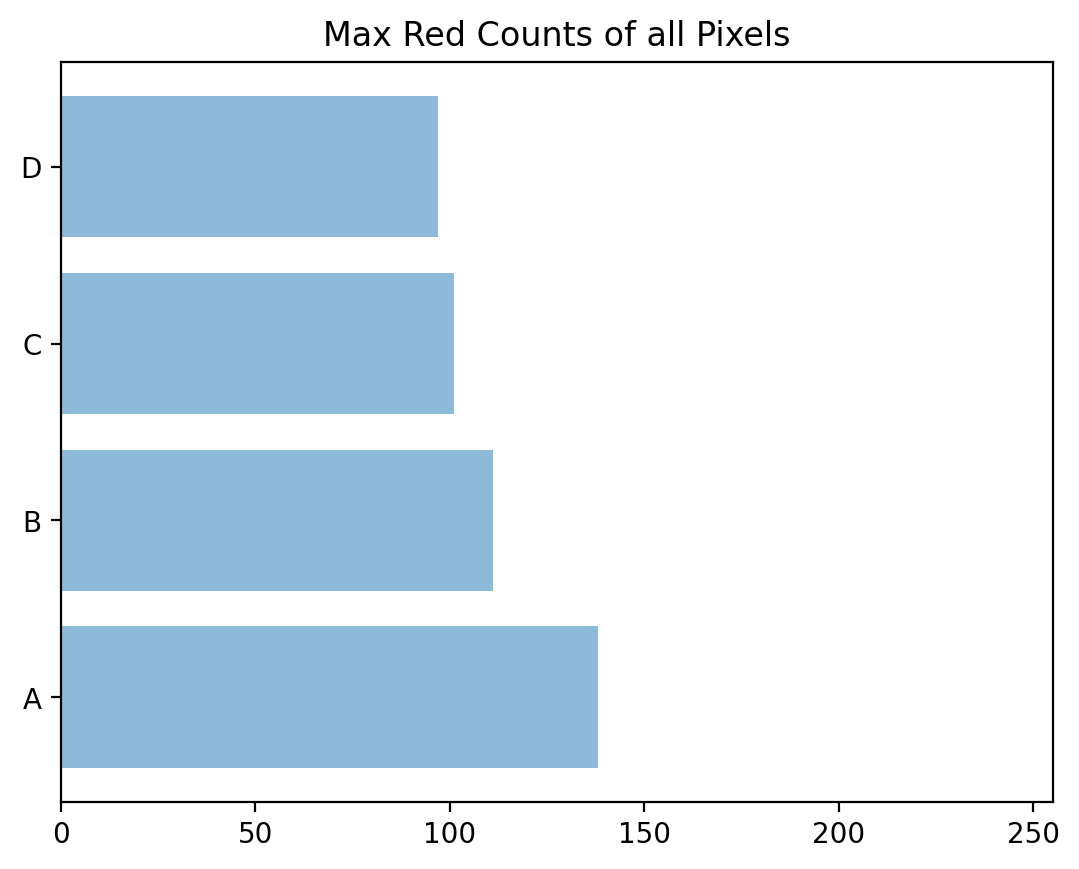

In [109]:
objects = sorted(df_filtered['name'])
y_pos = np.arange(len(objects))
performance = df_filtered['Max_PL']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlim(0,255)


plt.title('Max Red Counts of all Pixels')

plt.show()

### SubPlotting Red Counts

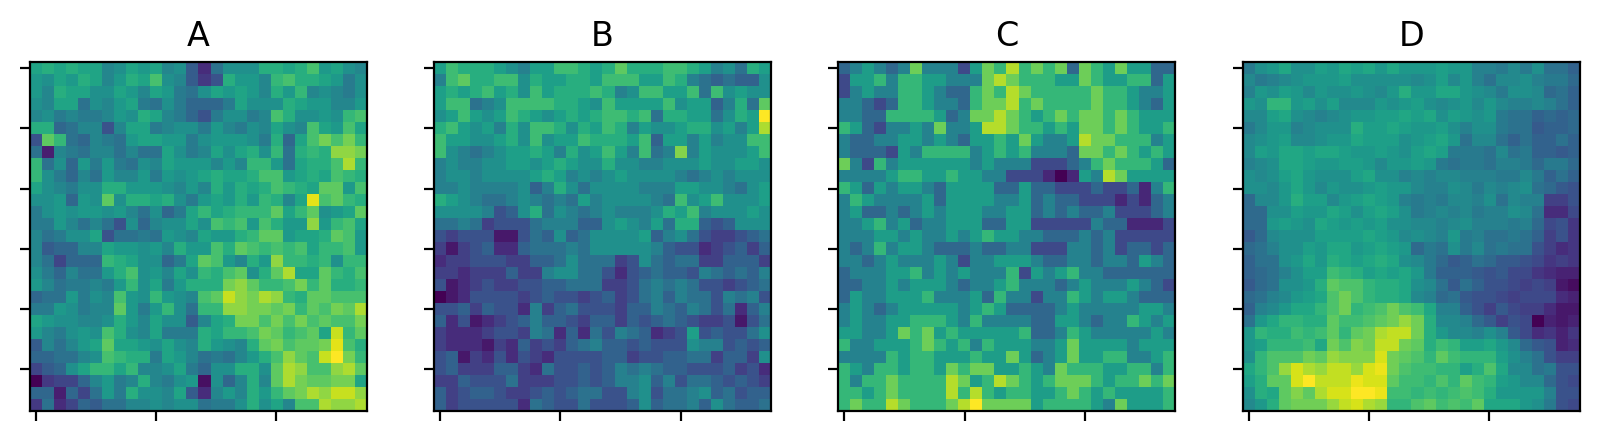

In [110]:
embiggen = 2.5
vert = 1
horiz = 4
fig, ax = plt.subplots(vert, horiz, figsize = (horiz*embiggen, vert*embiggen))
for n, ax_ in zip(range(0, len(df_filtered)), ax.ravel()):
    ax_.imshow(df_filtered['VIS'][n])
    ax_.set_title(df_filtered['name'][n])
    ax_.set_yticklabels([])
    ax_.set_xticklabels([])
# plt.savefig('figure_name')
plt.show()

### Plotting Red Counts

In [102]:
for n in range(0, len(df_filtered)):
    plt.imshow(df_filtered['PL'][n])
    plt.title(df_filtered['name'][n])
    plt.close() # change to plt.open() to individually plot each one